## Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# загружаем данные и сохраняем в переменные:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info.csv'),
    pd.read_csv('/datasets/orders_info.csv'),
    pd.read_csv('/datasets/costs_info.csv')
)

In [3]:
# Используем метод info чтобы изучить исходную информацию по визитам:
visits.info()
print('Количество дубликатов:', visits.duplicated().sum())
display(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов: 0


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


In [4]:
# Используем метод info чтобы изучить исходную информацию по заказам:
orders.info()
print('Количество дубликатов:', orders.duplicated().sum())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов: 0


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
# Используем метод info чтобы изучить исходную информацию о затратах на маркетинг:
costs.info()
print('Количество дубликатов:', costs.duplicated().sum())
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Количество дубликатов: 0


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Вывод об исходных данных:

В исходных данных отсутствуют пропуски и дубликаты, но для некоторых столбцов не соответствует тип данных. Во всех трёх таблицах необходимо привести данные с датой в формат datetime. Так же следует привести название столбцов во всех таблицах к единому формату.

In [6]:
# Приведём название столбцов к нижнему регистру и заменим " " на "_":
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns = {
    'user id': 'user_id',
    'session start': 'session_start',
    'session end': 'session_end'
})
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
# Приведём название столбцов к нижнему регистру и заменим " " на "_":
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns = {
    'user id': 'user_id',
    'event dt': 'event_dt'
})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [8]:
# Приведём название столбцов к нижнему регистру:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [9]:
# Поменяем формат во всех столбцах с датой:
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%d.%m.%Y %H:%M')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%d.%m.%Y %H:%M')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y.%m.%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y.%m.%d').dt.date

In [10]:
# Список регионов и кличество сессий из них:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
# Список устройств и кличество сессий по ним:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [12]:
# Получим списк рекламных инсточников и количество сессий через них, для привлечённых пользователей:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

### Вывод:

Привели названия столбцов к единому формату во всех таблицах, а так же привели столбцы с датой к формату datetime.

In [13]:
# Код ревьюера - посмотрим на данные из другого временного интервала:
start_data = "2019-06-01"
end_data = "2019-10-01"

display(visits.query('session_start < @start_data | session_start > @end_data').shape)

# Код ревьюера - проверим на наших данных:
start_data = "2019-05-01 00:00:00"
end_data = "2019-11-01"

visits.query('session_start < @start_data | session_start > @end_data').shape

(104682, 6)

(0, 6)

## Шаг 2. Проведите исследовательский анализ данных

In [14]:
# Сгруппируем и отсортируем таблицу, чтобы получить профили пользователей.
# Добавим столбец payer, в котором будет указано совершал ли пользователь покупки
profiles = visits.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
).reset_index()

profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

display(profiles.head())

,user_id,session_start,channel,device,region,payer
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,True
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,False
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,False
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,False
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,False


In [15]:
# Сгруппируем данные по странам:
profiles_by_country = profiles.groupby('region')['payer']\
    .agg({'count', 'mean'}).reset_index().sort_values(by='mean', ascending=False)
display(profiles_by_country.style.format({'mean': '{:.2%}'}))

,region,mean,count
3,United States,6.90%,100002
1,Germany,4.11%,14981
2,UK,3.98%,17575
0,France,3.80%,17450


In [16]:
# Сгруппируем данные по устройствам:
profiles_by_devices = profiles.groupby('device')['payer']\
    .agg({'count', 'mean'}).reset_index().sort_values(by='mean', ascending=False)
display(profiles_by_devices.style.format({'mean': '{:.2%}'}))

,device,mean,count
1,Mac,6.36%,30042
3,iPhone,6.21%,54479
0,Android,5.85%,35032
2,PC,5.05%,30455


In [17]:
# Сгруппируем данные по источникам привлечения:
profiles_by_channel = profiles.groupby('channel')['payer']\
    .agg({'count', 'mean'}).reset_index().sort_values(by='mean', ascending=False)
display(profiles_by_channel.style.format({'mean': '{:.2%}'}))

,channel,mean,count
1,FaceBoom,12.20%,29144
0,AdNonSense,11.34%,3880
9,lambdaMediaAds,10.47%,2149
6,TipTop,9.60%,19561
5,RocketSuperAds,7.91%,4448
7,WahooNetBanner,5.30%,8553
8,YRabbit,3.83%,4312
3,MediaTornado,3.57%,4364
2,LeapBob,3.06%,8553
4,OppleCreativeMedia,2.71%,8605


In [18]:
print('Минимальная дата привлечения пользователя:', profiles['session_start'].min())
print('Максимальная дата привлечения пользователя:', profiles['session_start'].max())

Минимальная дата привлечения пользователя: 2019-05-01 00:00:00
Максимальная дата привлечения пользователя: 2019-10-27 23:59:00


### Вывод:

Из полученных таблиц можно сделать следующие выводы:
1. Больше всего пользователей приходит из США. Американские пользователи так же чаще всего совершают покупки.
2. Больше всего пользователей используют смартфон от Apple. Они же, а так же пользователи Mac чаще всего совершают покупки.
3. Органический трафик привлекает больше всего клиентов, но среди таких пользователей очень мало тех, кто совершает покупки. На 2ом и 3ьем месте по количеству привлечённых клиентов - FaceBoom и TipTop.  Больше всего покупок совершают пользователи, привлечённые через FaceBoom.

## Шаг 3. Постройте отчёты и посчитайте метрики

### Продукт:

#### DAU, WAU, MAU

In [19]:
# Выделим в отдельные столбцы год, месяц неделю и дату пользовательской сессии:
visits['visit_date'] = visits['session_start'].dt.date
visits['visit_week'] = visits['session_start'].dt.week
visits['visit_month'] = visits['session_start'].dt.month
visits['visit_year'] = visits['session_start'].dt.year

In [20]:
# Сгруппируем данные по сессиям по дате,
# посчитаем колчетсво уникальных пользователей в день 
# и среднее количество пользователей в день за весь период:

dau = visits.groupby('visit_date').agg({'user_id': 'nunique'})
dau_mean = dau.mean()
print('Средние значения DAU за весь период = ', int(dau_mean[0]))

Средние значения DAU за весь период =  1684


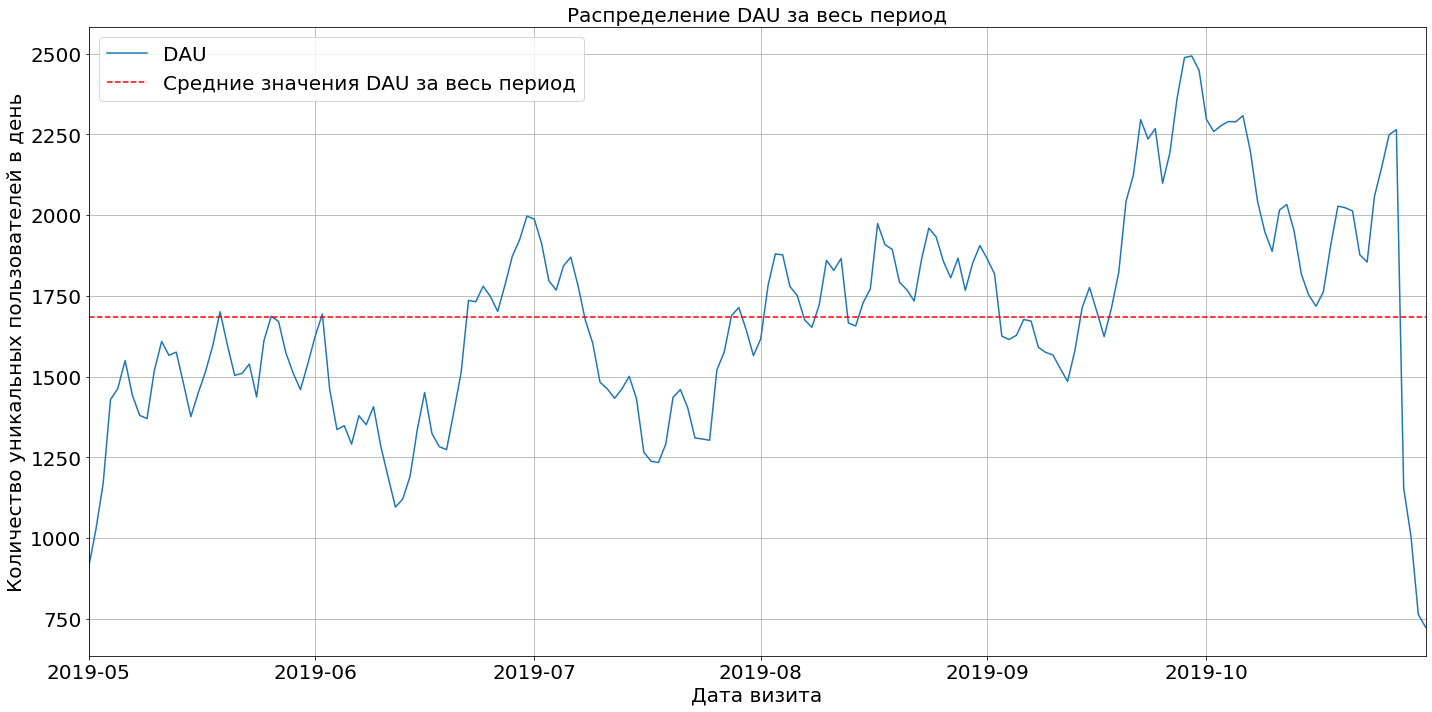

In [21]:
# Построим график для DAU:
dau.plot(
    grid=True,
    figsize=(20, 10),
    fontsize = 20,
    
)

plt.axhline(y=int(dau_mean), color='red', linestyle='--')
plt.xlabel('Дата визита', size=20)
plt.ylabel('Количество уникальных пользователей в день', size=20)
plt.title('Распределение DAU за весь период', size=20)
plt.legend(['DAU', 'Средние значения DAU за весь период'], fontsize=20)
plt.tight_layout()

In [22]:
# Сгруппируем данные по сессиям по неделям,
# посчитаем колчетсво уникальных пользователей в неделю 
# и среднее количество пользователей в неделю за весь период:

wau = visits.groupby(['visit_year', 'visit_week']).agg({'user_id': 'nunique'})
wau_mean = wau.mean()
print('Средние значения DAU за весь период = ', int(wau_mean[0]))

Средние значения DAU за весь период =  8353


In [23]:
# Функция чтобы определить дату начала недели по номеру недели:
def get_floor_borders_start_on_monday(week_number):
    start = datetime.strptime(f"2019-{week_number}-1", "%Y-%W-%w")
    return start

# Функция чтобы определить дату конца недели по номеру недели:
def get_ceil_borders_start_on_monday(week_number):
    end = datetime.strptime(f"2019-{week_number}-0", "%Y-%W-%w")
    return end

In [24]:
# Сделаем ресет индксов, чтобы получить дотсуп к столбцу visit_week:
wau = wau.reset_index()
# Сохраним в два отдельных столбца начало и конце недели, в зависимости от номера недели в visit_week:
wau['week_dates_start'] = wau['visit_week'].apply(get_floor_borders_start_on_monday).astype('str')
wau['week_dates_end'] = wau['visit_week'].apply(get_ceil_borders_start_on_monday).astype('str')

In [25]:
# Сделаем срез в значениях и отбросим "2019-" и сложим две строки с началом и концом недели:
wau['week_dates'] = wau['week_dates_start'].str[5:] + ':' + wau['week_dates_end'].str[5:]

# Удалим из таблицы wau неиспользуемые столбцы:
wau = wau.drop(columns=['week_dates_start', 'week_dates_end', 'visit_year', 'visit_week'])

In [26]:
# установим столбец week_dates как индекс в нашей таблице:
wau=wau.set_index('week_dates', drop=True)

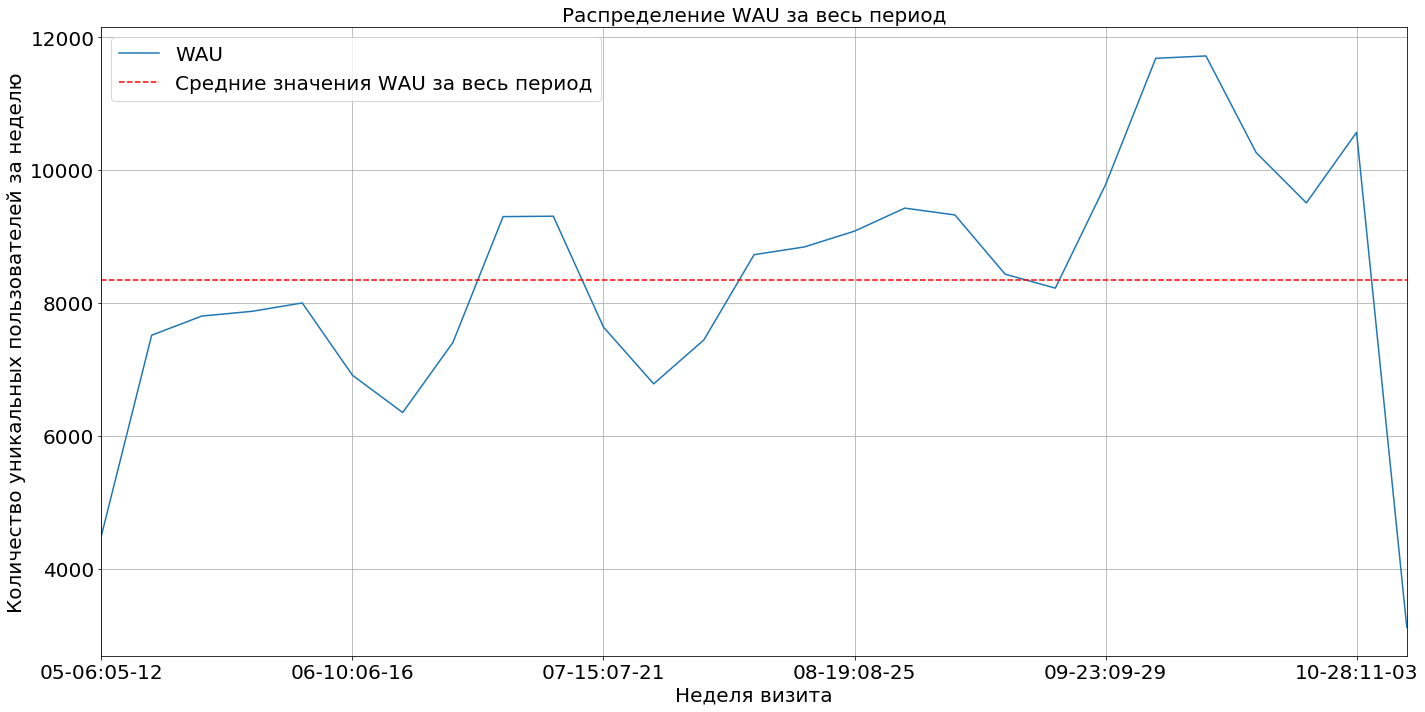

In [27]:
# Построим график для WAU:
wau.plot(
    grid=True,
    figsize=(20, 10),
    fontsize = 20,
    
)

plt.axhline(y=int(wau_mean), color='red', linestyle='--')
plt.xlabel('Неделя визита', size=20)
plt.ylabel('Количество уникальных пользователей за неделю', size=20)
plt.title('Распределение WAU за весь период', size=20)
plt.legend(['WAU', 'Средние значения WAU за весь период'], fontsize=20)
plt.tight_layout()

In [29]:
# Сгруппируем данные по сессиям по месяцам,
# посчитаем колчетсво уникальных пользователей в месяц 
# и среднее количество пользователей в месяц за весь период:

mau = visits.groupby(['visit_year', 'visit_month']).agg({'user_id': 'nunique'})
mau_mean = mau.mean()
print('Средние значения MAU за весь период = ', int(mau_mean[0]))

Средние значения MAU за весь период =  28989


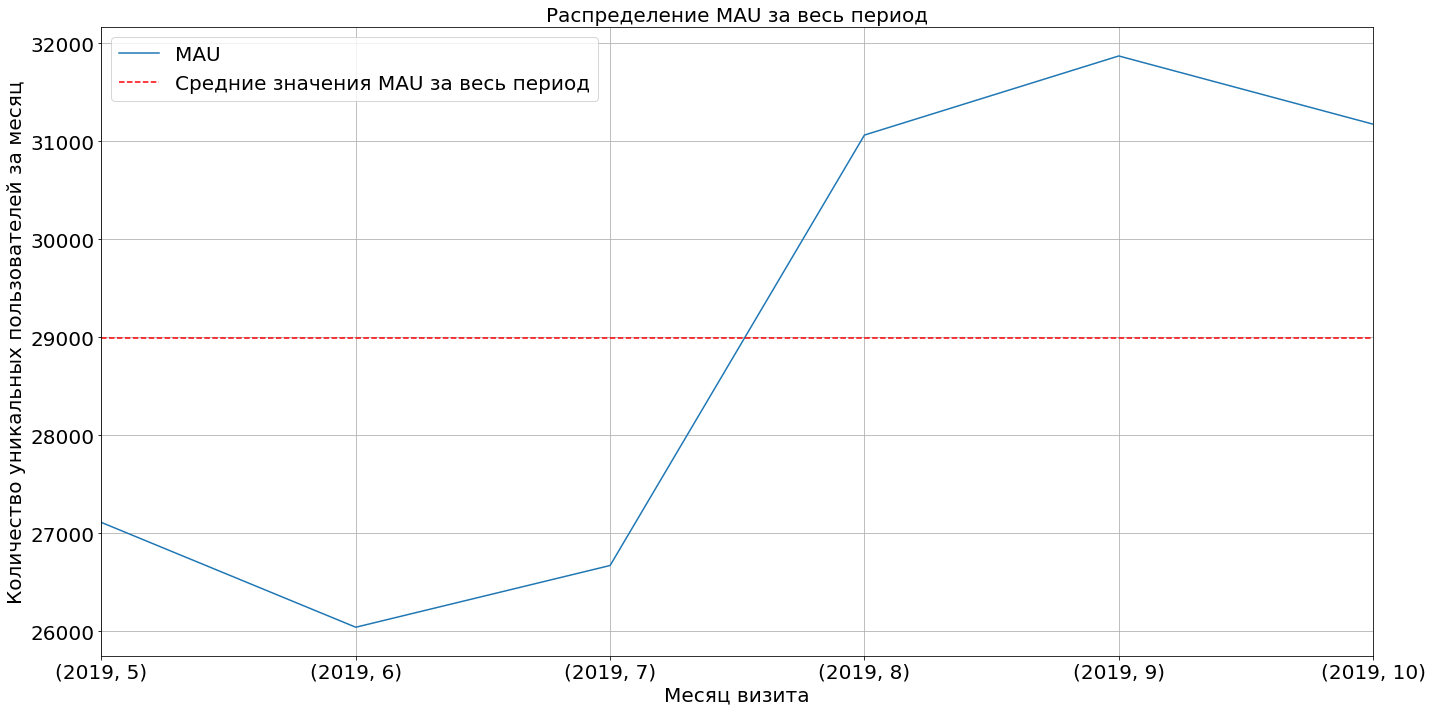

In [30]:
# Построим график для MAU:
mau.plot(
    grid=True,
    figsize=(20, 10),
    fontsize = 20, 
)

plt.axhline(y=int(mau_mean), color='red', linestyle='--')
plt.xlabel('Месяц визита', size=20)
plt.ylabel('Количество уникальных пользователей за месяц', size=20)
plt.title('Распределение MAU за весь период', size=20)
plt.legend(['MAU', 'Средние значения MAU за весь период'], fontsize=20)
plt.tight_layout()

##### Вывод:

На графиках для DAU, WAU, MAU прослеживается восходящая тенденция на протяжении всего временного периода нашего анализа. Так же почти во все месяцы был спад по количеству уникальных пользователей в середине месяца, исключение - август. В августе количество уникальных пользоватлей было стабильно, провалов в середине месяца нет. Спад данных в конце октября обусловлен тем, что у нас данные только до 27 октября включительно (хорошо прослеживается на графике WAU).

#### Изучим число пользовательских сессий:

In [31]:
# Сгруппируем данные по дате визита и посчитаем среднее количество сессий в день:
visits_per_day = visits.groupby('visit_date')['user_id'].count()
print('Средние количество сессий за день = ', int(visits_per_day.mean()))

Средние количество сессий за день =  1684


Гистограмма распределения общего числа сессий в день:

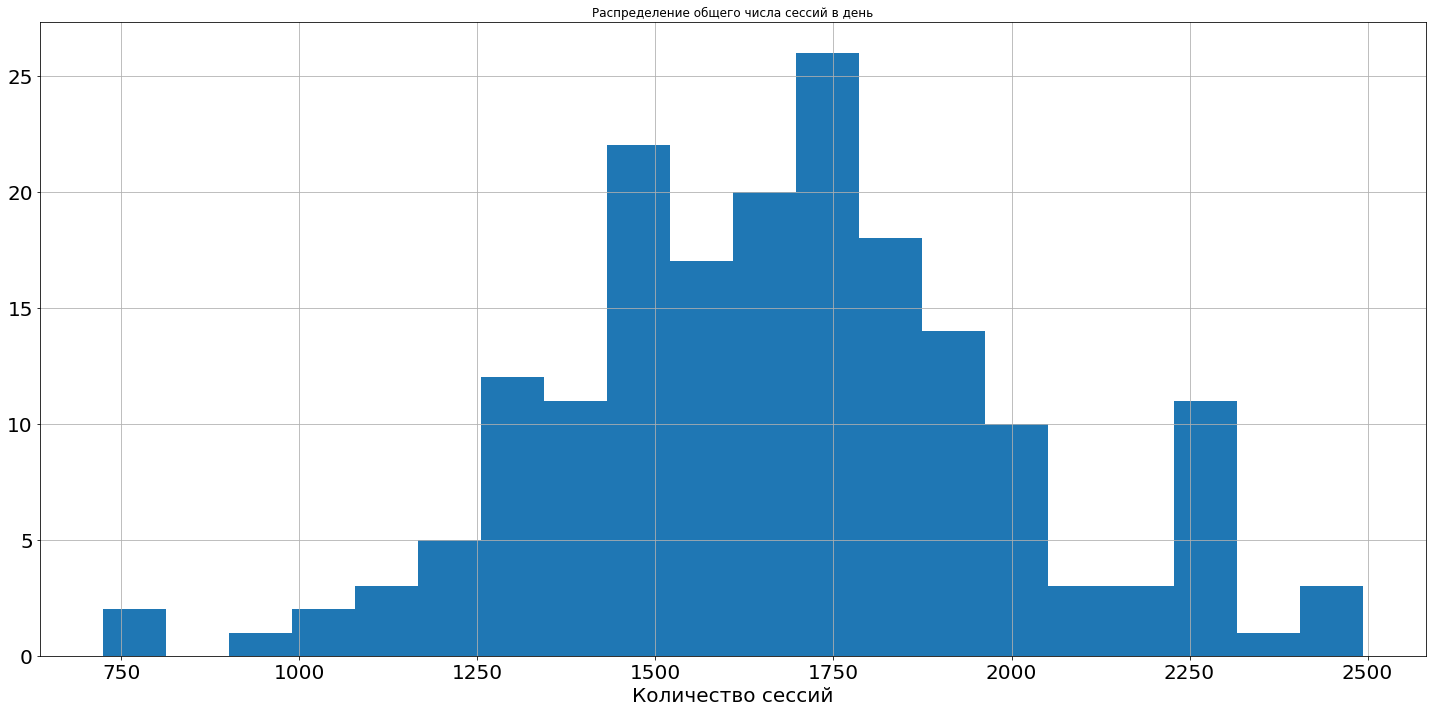

In [32]:
visits_per_day.plot.hist(
    title='Распределение общего числа сессий в день',
    bins=20,
    grid=True,
    figsize=(20,10),
    fontsize = 20
)
plt.xlabel('Количество сессий', size=20)
plt.ylabel('')
plt.tight_layout()

#### Cколько длится одна сессия:

In [33]:
# Посчитаем длительность сессий в минутах, посмотрим параметры распределения методом describe():
visits['session_duration'] = (visits['session_end'] - visits['session_start'])
visits['session_duration_in_minutes'] = visits['session_duration'].dt.total_seconds()/60
visits['session_duration_in_minutes'].describe()

count    309901.000000
mean         30.001413
std          30.053164
min           0.000000
25%           9.000000
50%          21.000000
75%          42.000000
max         371.000000
Name: session_duration_in_minutes, dtype: float64

Гистограмма распределения длительности сессий:

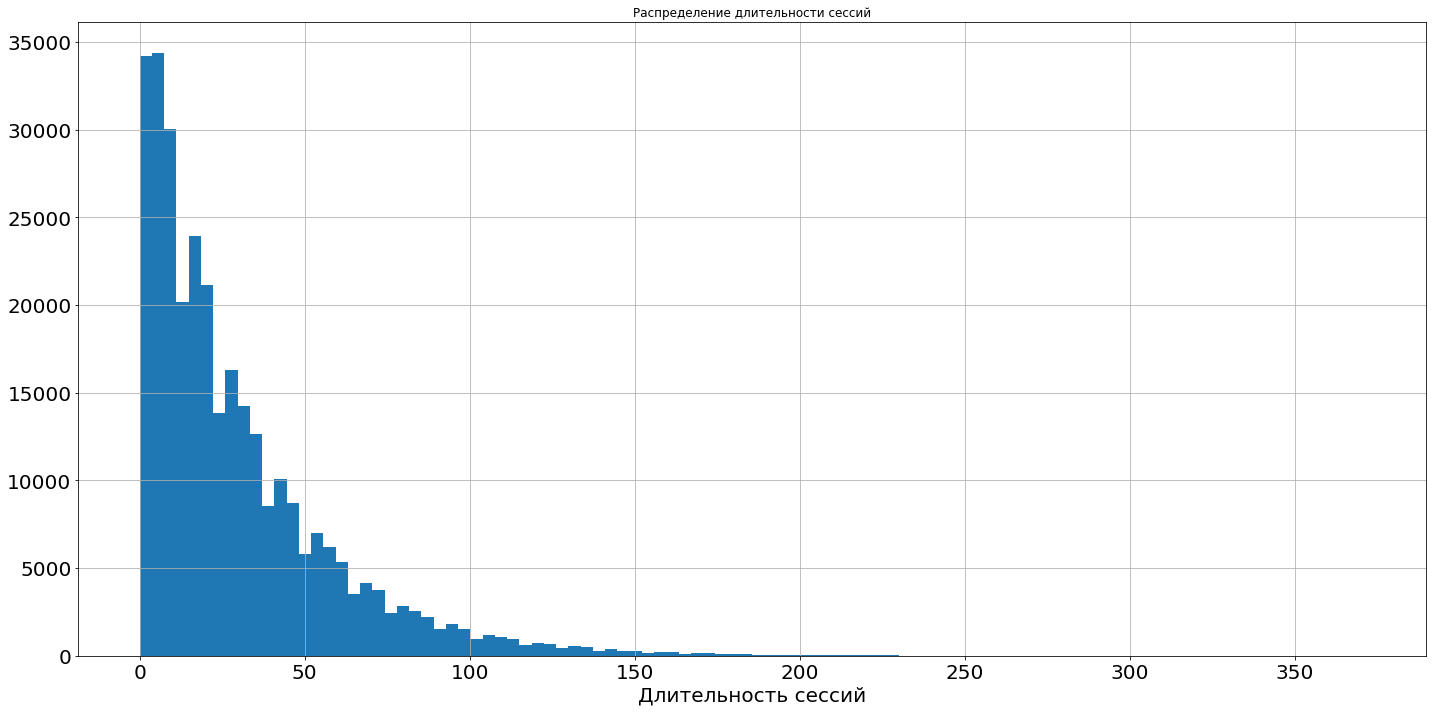

In [34]:
visits['session_duration_in_minutes'].plot.hist(
    title='Распределение длительности сессий',
    bins=100,
    grid=True,
    figsize=(20,10),
    fontsize = 20
)
plt.xlabel('Длительность сессий', size=20)
plt.ylabel('')
plt.tight_layout()

#### Вывод:

Мы рассчитали метрики DAU, WAU и MAU нашего продукта. Посчитали среднюю продолжительность одной сессии, которая оказалась равна 30 минутам, а так же посчитали среднее количество сессий в день, оно оказалось равно 1684. Из этих метрик видно резкое снижение количества уникальных пользователей во второй половине октября. При этом среднее количество сессий совпало со средним значением DAU, что выглядит подозрительно. Гистограмма распределения общего числа сессий в день стремится к нормальному распределению. При это гистограмма распределения длительности сессий скошено вправо: 75% всех значений находятся при длительности сессии менее 42 минут.

### Продажи:

#### Сколько времени в среднем проходит с момента первого посещения до покупки:

In [35]:
# Сгруппируем таблицу orders по user_id после сортировки и найдём дату совершения первой покупки:
first_orders = orders.sort_values(by=['user_id', 'event_dt']).groupby('user_id').agg(
            {
                'event_dt': 'first',
                'revenue': 'first'
            }
).reset_index()

In [36]:
# Объединим таблицы profiles и orders по user_id и тем самым получим профили тех пользователей,
# которые совершили покупки. Сохраним для каждого пользователя в отдельным столбец время,
# которое прошло с момента первого посещения до совершения покупки:
profiles_payer = profiles.merge(first_orders, on='user_id')
profiles_payer['time_for_purchase'] = profiles_payer['event_dt'] - profiles_payer['session_start']

In [37]:
print(
    'Среднее время на совершение покупки:', (profiles_payer['time_for_purchase'].mean())
)

Среднее время на совершение покупки: 1 days 21:11:50.693052


На совершение покупки у пользователей в среднем уходит 1 день 21 час и 12 минут.

count                      8881
mean     1 days 21:11:50.693052
std      6 days 00:52:20.165837
min             0 days 00:00:00
25%             0 days 00:00:41
50%             0 days 00:01:10
75%             1 days 11:28:52
max           132 days 03:54:55
Name: time_for_purchase, dtype: object

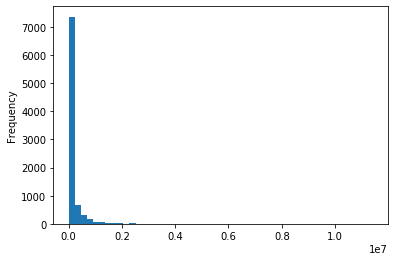

In [38]:
# Код ревьюера:

display(profiles_payer['time_for_purchase'].describe())
profiles_payer['time_for_purchase'].dt.total_seconds().plot(kind = 'hist', bins = 50)

#### Среднее число покупок на одного покупателя за день, неделю и месяц:

In [39]:
# Выделим в отдельные столбцы месяц, неделю и дату, когда была совершена первая сессия:
orders['event_date'] = orders['event_dt'].dt.date
orders['event_week'] = orders['event_dt'].dt.week
orders['event_month'] = orders['event_dt'].dt.month

In [40]:
# Сгруппируем данные о покупках по дням и посчитаем количество уникальных клиентов и сколько покупок они совершили:
orders_by_event_date = orders.groupby('event_date').agg({'user_id': 'nunique', 'event_dt': 'count'})
orders_by_event_date.columns=['buyers', 'orders'] # переименуем столбцы
# Количество покупок на одного покупателя в день:
orders_by_event_date['orders_per_buyer'] = orders_by_event_date['orders'] / orders_by_event_date['buyers']

In [41]:
print('Среднее количество покупок в день на одного покупателя за весь срок исследования равно: {:.2f}'
      .format(orders_by_event_date['orders_per_buyer'].mean()))

Среднее количество покупок в день на одного покупателя за весь срок исследования равно: 1.00


In [42]:
# Сгруппируем данные о покупках по неделям и посчитаем количество уникальных клиентов и сколько покупок они совершили:
orders_by_event_week = orders.groupby('event_week').agg({'user_id': 'nunique', 'event_dt': 'count'})
orders_by_event_week.columns=['buyers', 'orders'] # переименуем столбцы
# Количество покупок на одного покупателя в неделю:
orders_by_event_week['orders_per_buyer'] = orders_by_event_week['orders'] / orders_by_event_week['buyers']

In [43]:
print('Среднее количество покупок в неделю на одного покупателя за весь срок исследования равно: {:.2f}'
      .format(orders_by_event_week['orders_per_buyer'].mean()))

Среднее количество покупок в неделю на одного покупателя за весь срок исследования равно: 1.33


In [44]:
# Сделаем ресет индексов, чтобы получить дотсуп к столбцу event_week:
orders_by_event_week = orders_by_event_week.reset_index()
# Сохраним в два отдельных столбца начало и конце недели, в зависимости от номера недели в event_week:
orders_by_event_week['week_dates_start'] = orders_by_event_week['event_week'].apply(get_floor_borders_start_on_monday).astype('str')
orders_by_event_week['week_dates_end'] = orders_by_event_week['event_week'].apply(get_ceil_borders_start_on_monday).astype('str')

In [45]:
# Сделаем срез в значениях и отбросим "2019-" и сложим две строки с началом и концом недели:
orders_by_event_week['week_dates'] = orders_by_event_week['week_dates_start'].str[5:] +\
    ':' + orders_by_event_week['week_dates_end'].str[5:]

# Удалим из таблицы неиспользуемые столбцы:
orders_by_event_week = orders_by_event_week.drop(columns=['week_dates_start', 'week_dates_end', 'event_week'])

In [46]:
# установим столбец week_dates как индекс в нашей таблице:
orders_by_event_week=orders_by_event_week.set_index('week_dates', drop=True)

In [47]:
# Сгруппируем данные о покупках по месяцам и посчитаем количество уникальных клиентов и сколько покупок они совершили:
orders_by_event_month = orders.groupby('event_month').agg({'user_id': 'nunique', 'event_dt': 'count'})
orders_by_event_month.columns=['buyers', 'orders'] # переименуем столбцы
# Количество покупок на одного покупателя в месяц:
orders_by_event_month['orders_per_buyer'] = orders_by_event_month['orders'] / orders_by_event_month['buyers']

In [48]:
print('Среднее количество покупок в месяц на одного покупателя за весь срок исследования равно: {:.2f}'
      .format(orders_by_event_month['orders_per_buyer'].mean()))

Среднее количество покупок в месяц на одного покупателя за весь срок исследования равно: 2.23


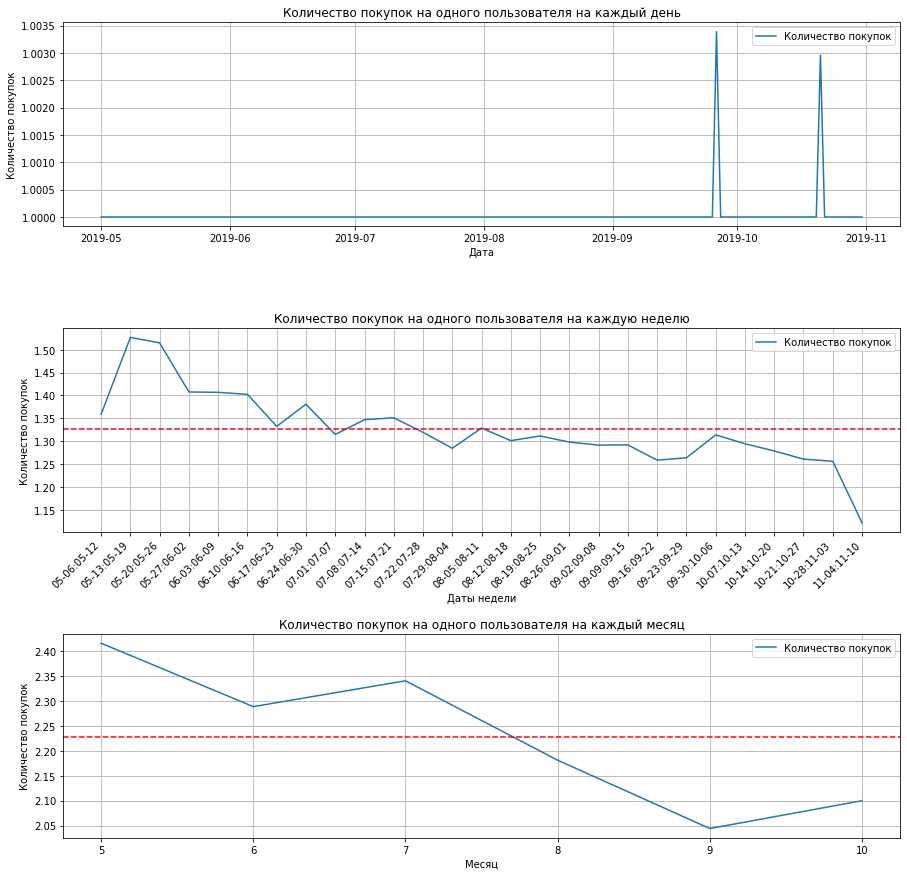

In [49]:
# Построим графики распределения среднего числа покупок по времени:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(15, 15))

axes[0].set_ylabel('Количество покупок')
axes[0].set_xlabel('Дата')
axes[0].set_title('Количество покупок на одного пользователя на каждый день')
axes[0].plot(orders_by_event_date['orders_per_buyer'])
axes[0].legend(labels=['Количество покупок'])
axes[0].grid()

axes[1].set_ylabel('Количество покупок')
axes[1].set_xlabel('Даты недели')
axes[1].set_title('Количество покупок на одного пользователя на каждую неделю')
axes[1].plot(orders_by_event_week['orders_per_buyer'])
axes[1].legend(labels=['Количество покупок'])
axes[1].grid()
plt.draw()
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].axhline(y=orders_by_event_week['orders_per_buyer'].mean(), color='red', linestyle='--')

axes[2].set_ylabel('Количество покупок')
axes[2].set_xlabel('Месяц')
axes[2].set_title('Количество покупок на одного пользователя на каждый месяц')
axes[2].plot(orders_by_event_month['orders_per_buyer'])
axes[2].legend(labels=['Количество покупок'])
axes[2].grid()
axes[2].axhline(y=orders_by_event_month['orders_per_buyer'].mean(), color='red', linestyle='--')

plt.subplots_adjust(hspace=0.5)
plt.show()

##### Вывод:

Мы посчитали количество покупок, которые совершают пользователи на каждый день, каждую неделю и каждый месяц. График покупок за каждый день стабилен - пользователи в среднем совершают не более одной покупки в день. А вот недельные и месячные графики показывают нисходящую тенденцию на протяжении рассматриваемого периода. С учётом графиков DAU, WAU, MAU, которые показывают рост числа уникальных пользователей за этот же период, можно сделать вывод о том, что пользователи всё реже совершают повторные покупки.

#### Средний чек за день, неделю и месяц:

In [50]:
# Выделим в отдельные столбцы месяц, неделю и дату, когда была совершена покупка:
orders['purchase_date'] = orders['event_dt'].dt.date
orders['purchase_week'] = orders['event_dt'].dt.week
orders['purchase_month'] = orders['event_dt'].dt.month

In [51]:
# Сгруппируем данные о покупках по дням, неделям и месяцам и посчитаем среднее значение выручки:
revenue_per_day = orders.groupby('purchase_date')['revenue'].mean()
revenue_per_week = orders.groupby('purchase_week')['revenue'].mean()
revenue_per_month = orders.groupby('purchase_month')['revenue'].mean()

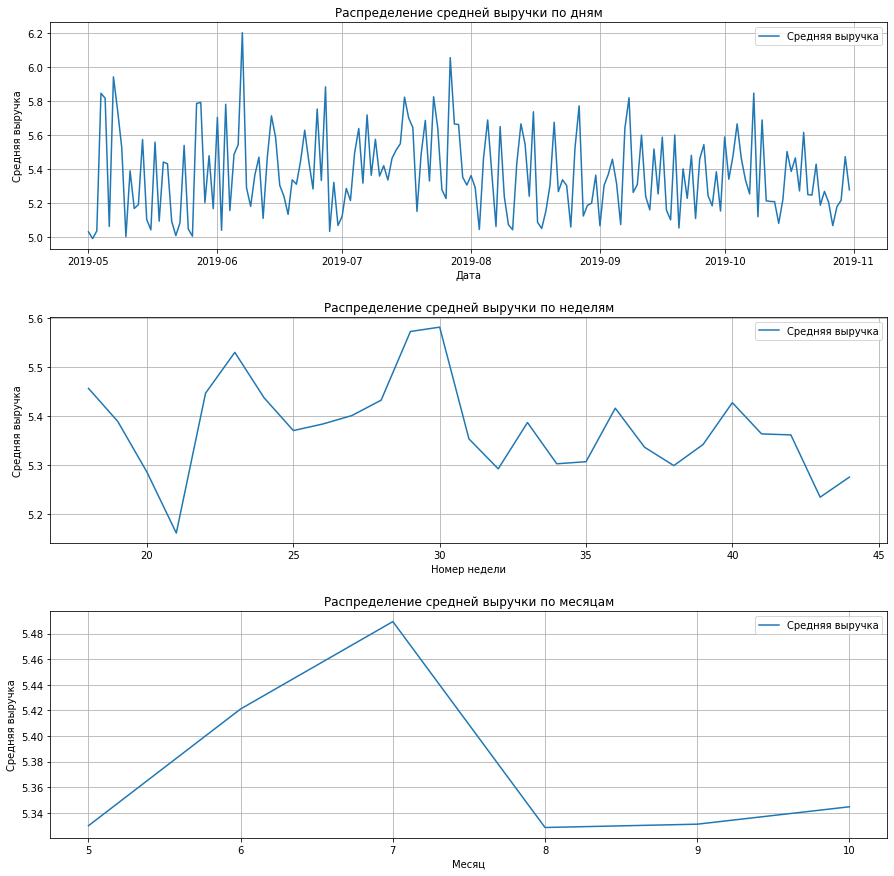

In [52]:
# Построим графики распределения средней выручки по времени:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(15, 15))

axes[0].set_ylabel('Средняя выручка')
axes[0].set_xlabel('Дата')
axes[0].set_title('Распределение средней выручки по дням')
axes[0].plot(revenue_per_day)
axes[0].legend(labels=['Средняя выручка'])
axes[0].grid()

axes[1].set_ylabel('Средняя выручка')
axes[1].set_xlabel('Номер недели')
axes[1].set_title('Распределение средней выручки по неделям')
axes[1].plot(revenue_per_week)
axes[1].legend(labels=['Средняя выручка'])
axes[1].grid()

axes[2].set_ylabel('Средняя выручка')
axes[2].set_xlabel('Месяц')
axes[2].set_title('Распределение средней выручки по месяцам')
axes[2].plot(revenue_per_month)
axes[2].legend(labels=['Средняя выручка'])
axes[2].grid()

plt.subplots_adjust(hspace=0.3)
plt.show()

#### Вывод:

В данном блоке мы провели анализ среднего числа покупок на одного клиента и среднего чека. На графиках выше прослеживается следующая динамика: средняя выручка не показывает рост, и даже наблюдается набольшое снижение к концу периода анализа, которое обусловленно тем, что пользователи всё реже совершают повторные покупки.

### Маркетинг:

#### Общие расходы на маркетинг, распределение расходов по источникам:

Посчитаем суммарные маркетинговые расходы:

In [53]:
print('Общая сумма расходов на маркетинг составила: {:.2f} рублей.'.format(costs['costs'].sum()))

Общая сумма расходов на маркетинг составила: 105497.30 рублей.


In [54]:
# Сгруппируем данные с расходами на маркетинг по каналам привлечения:
costs_by_channel = costs.groupby('channel')['costs'].sum().reset_index()
print(costs_by_channel.sort_values(by='costs', ascending=False))

              channel     costs
6              TipTop  54751.30
1            FaceBoom  32445.60
7      WahooNetBanner   5151.00
0          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
2             LeapBob   1797.60
9      lambdaMediaAds   1557.60
3        MediaTornado    954.48
8             YRabbit    944.22


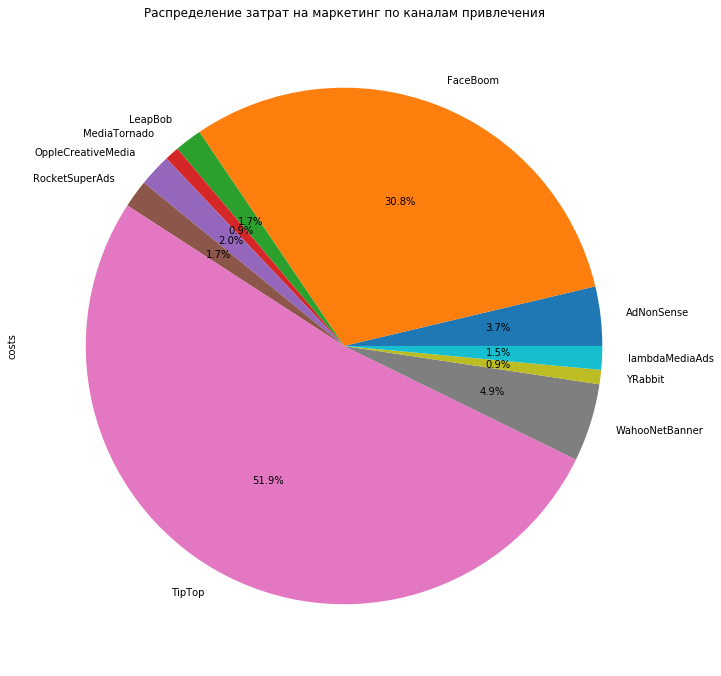

In [55]:
# Построим круговую диаграмму для наглядного отображения расходов на маркетинг по различным каналам:
costs_by_channel['costs'].plot(
    kind='pie',
    labels = costs_by_channel['channel'],
    autopct='%1.1f%%',
    #radius=3
    figsize=(10,10),
    title='Распределение затрат на маркетинг по каналам привлечения'
)
plt.tight_layout()

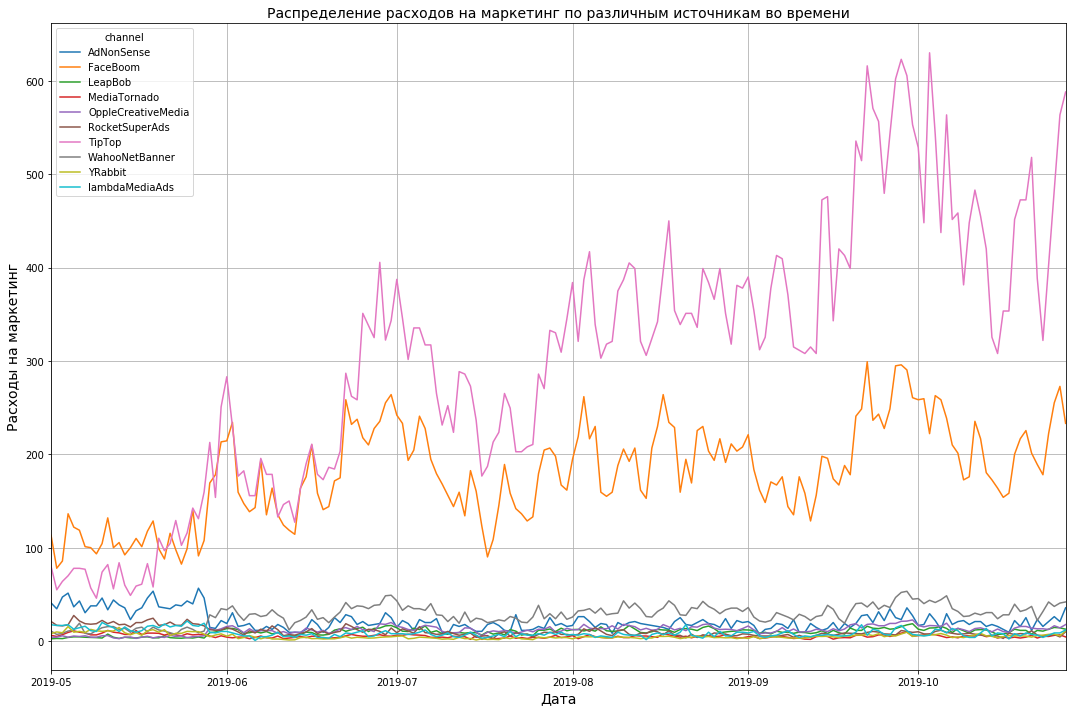

In [56]:
# Сведём данные в сводную таблицу и построим график распределения расходов во времени:
costs_by_date = costs.pivot_table(index='dt', columns='channel', values='costs')

costs_by_date.plot(
    figsize=(15,10),
    grid=True,
)

plt.xlabel('Дата', size=14)
plt.ylabel('Расходы на маркетинг', size=14)
plt.title('Распределение расходов на маркетинг по различным источникам во времени', size=14)
plt.tight_layout()

##### Вывод:

Расходы на привлечение новых клиентов по всем каналам оставались стабильными на всём периоде исследования, за исключением двух каналов: Faceboom и TipTop. Затраты на Faceboom увеличилсь приблизительно в 2 раза в период времени с июня по ноябрь, по сравнению с маем. А завтрат на TipTop показывали непрерывный рост на всём периоде исследования, показв приблизительно 6ти кратный рост с мая по ноябрь. Кратный рост росходов по этим двум источникам не привёл к кратному росту числа уникальных пользователей.

#### Средняя стоимость привлечения одного пользователя из каждого источника:

In [57]:
# Переименуем столбец session_date в dt:
profiles=profiles.rename(columns={'session_start': 'dt'})

In [58]:
# Количество уникальных пользователей с одинаковыми источником и датой привлечения:
new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'}) # столбец с числом пользователей назовём unique_users
        .reset_index()  # возвращаем dt и channel из индексов
    )

In [59]:
new_users['dt'] = pd.to_datetime(new_users['dt'], format='%Y.%m.%d').dt.date

In [60]:
# Объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения:
ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

In [61]:
# Делим рекламные расходы на число привлечённых пользователей,
# результаты сохраним в столбец acquisition_cost (CAC):
ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

In [62]:
# Средний CAC на одного пользователя:
cac_total_project = ad_costs['costs'].sum() / ad_costs['unique_users'].sum()
print('Средняя стоимость привлечения одного пользователя равна: {:.2f}'.format(cac_total_project))

Средняя стоимость привлечения одного пользователя равна: 132.45


In [63]:
# Группируем по каналам привлечения и просуммируем расходын на маркетинг и количество привлечённых пользователей:
cac_per_channel = ad_costs.groupby('channel')['costs', 'unique_users'].sum().reset_index()
cac_per_channel['cac'] = cac_per_channel['costs'] / cac_per_channel['unique_users']

display(cac_per_channel.sort_values(by='cac', ascending=False))

,channel,costs,unique_users,cac
6,TipTop,6.360706e+06,19561,325.172823
1,FaceBoom,5.330856e+06,29144,182.914367
7,WahooNetBanner,2.702232e+05,8553,31.593967
0,AdNonSense,1.001784e+05,3880,25.819175
4,OppleCreativeMedia,1.131638e+05,8605,13.150930
5,RocketSuperAds,5.020886e+04,4448,11.287963
2,LeapBob,9.445170e+04,8553,11.043108
9,lambdaMediaAds,2.216720e+04,2149,10.315123
8,YRabbit,2.612580e+04,4312,6.058859
3,MediaTornado,2.547312e+04,4364,5.837104


#### Вывод:

Больше половины всех расходов на маркетинг идет на канал привлечения TipTop, что не удивительно, ведь стоимость привлечения через этот практически в 2 раза выше, чем привлечение пользователей через другие каналы. При этом большинство пользователей приходит через другой канал FaceBoom. Маркетинговая стратегия явно нуждается в корректировке.

### Вывод:

Проведя исследования в данном разделе, мы установили следующие факты:
1) Средняя выручка и количество покупок практически не изменилось в рассматриваемый нами период.
2) В конце рассматриваемого периода(октябрь месяц) наблюдается резкое снижение новых пользователей: возможно это вызвано тем, что данные не полные за октябрь, либо встречается какая-то техническая проблема или не правильно работает реклама.
3) Расходы на маркетинг стабильно растут по двум каналам привлечения клиентов: TipTop и FaceBoom.

По итогу получаем, что выручка и количество покупок не меняется, а затраты на маркетинг растут.

## Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии.

In [64]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [65]:
# Получим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles = profiles.query('channel != "organic"')

In [66]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [67]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [68]:
# Получим данные по удержанию:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [69]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [70]:
# Получим данные по конверсии:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [71]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [72]:
# Получим данные по LTV & ROI:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

In [73]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [74]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [75]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [76]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

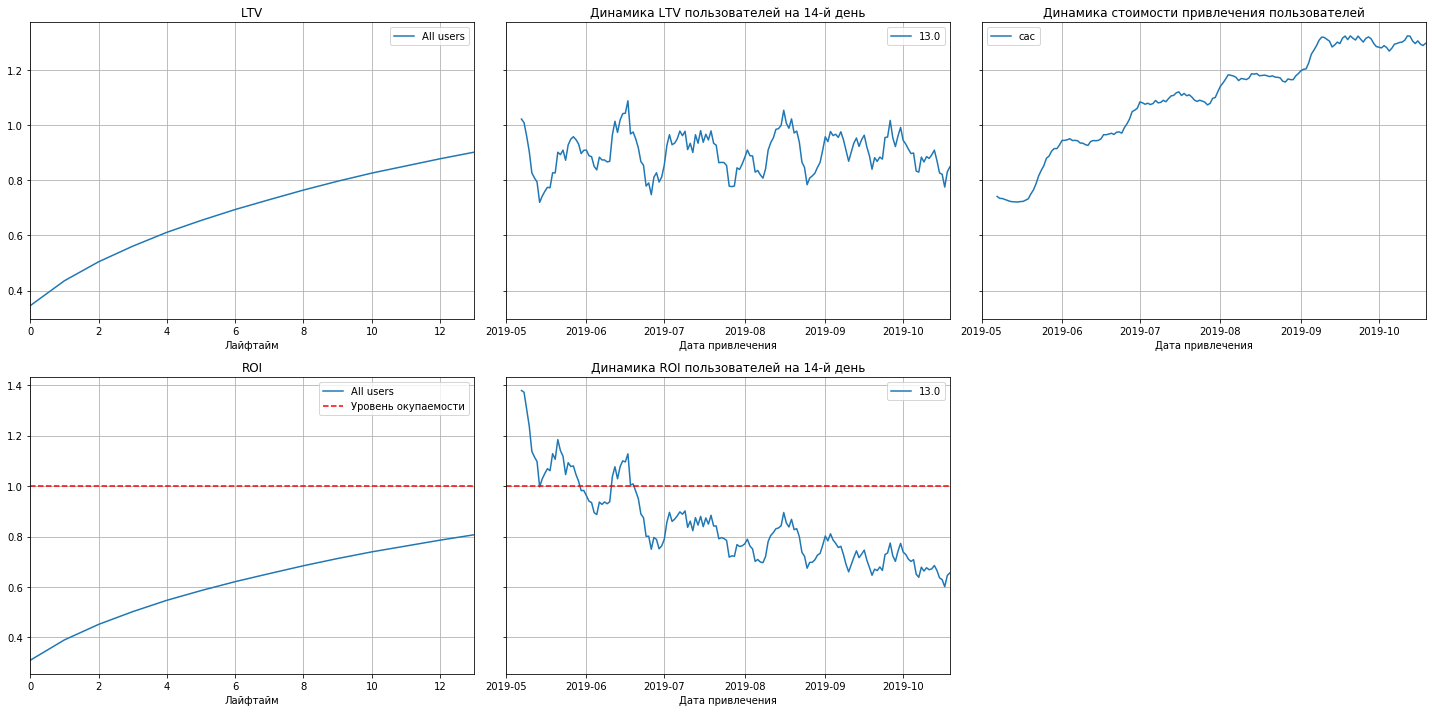

In [77]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Вывод:

По графикам можно сделать следующие выводы:
1. Реклама не окупается. ROI в конце двух недель около 80%.
2. Стоимость привлечения пользователя (CAC) показывает непрерывный рост, начиная с середины мая.
3. Динамика LTV стабильна.
4. Динамика ROI показывает снижение, что скорее всего обусловленно непрерывном ростом CAC.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

In [78]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

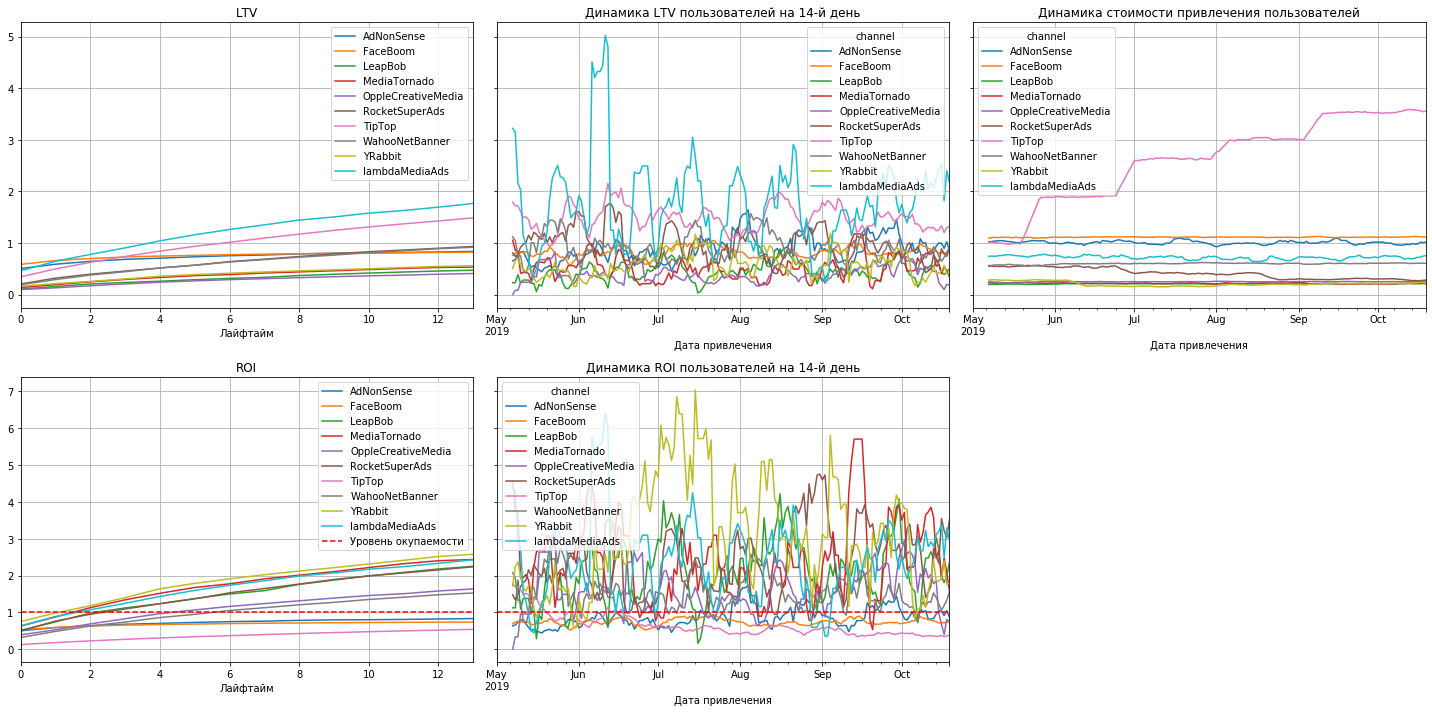

In [79]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Вывод:

1. Динамика стоимости привлечения пользователей стабильна для всех каналов, за исключением - TipTop. Стоимость привлечения через этот канал показывает сильный рост от месяца к месяцу.
2. Реклама не окупается по следующим каналам: TipTop, FaceBoom, LeapBob.

### Проанализируйте окупаемость рекламы с разбивкой по странам.

In [80]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

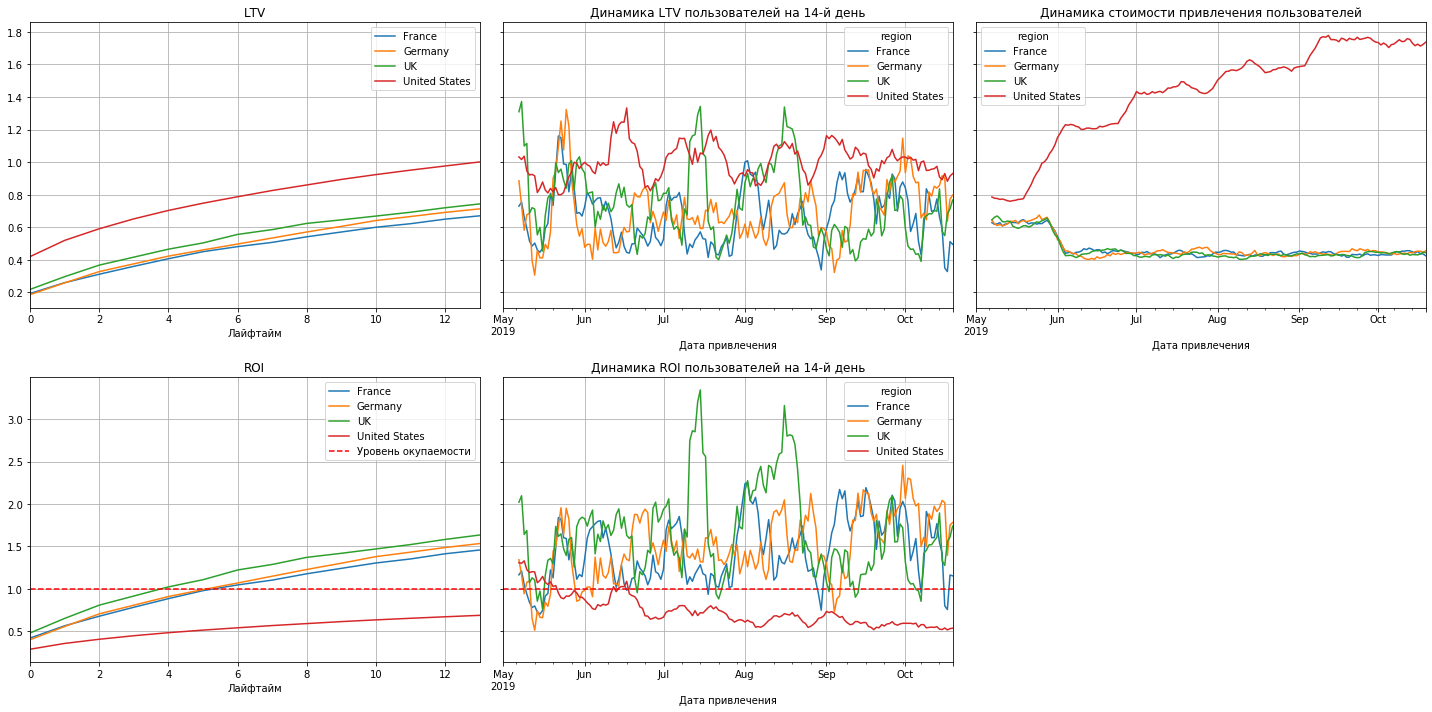

In [81]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Вывод:

1. Реклама не окупается в США. ROI в конце двух недель в США составляет около 70%.
2. За полгода рассматриваемого периода стоимость привлечения новых пользователей в США выросла практически в 2,5 раза. Что так же привело к снижению в динамике ROI в разрезе 14ти дней.

### Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

#### Графики конверсии и удержания с разбивкой по устройствам:

In [82]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

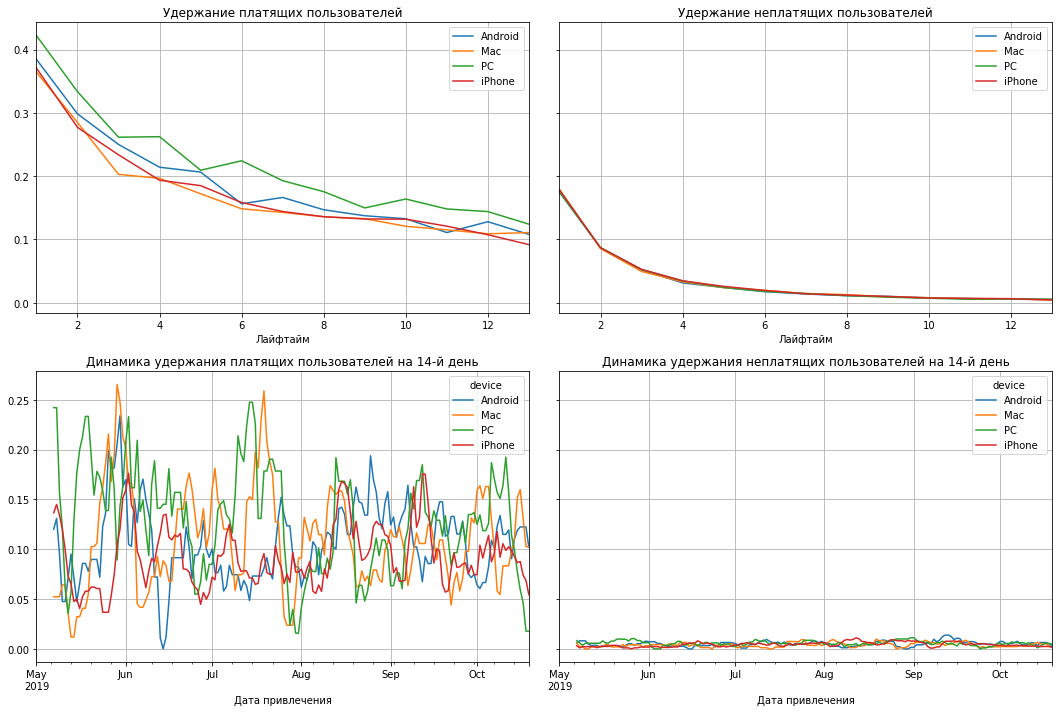

In [83]:
plot_retention(retention, retention_history, horizon_days, window=7)

In [84]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

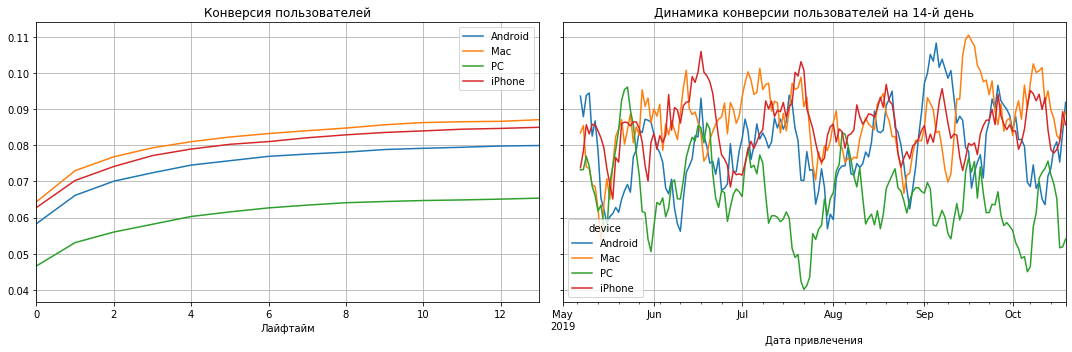

In [85]:
plot_conversion(conversion, conversion_history, horizon_days, window=7)

##### Вывод:

1. На графиках всё в порядке, не замечено явных аномалий: удержание платящих и не платящих польователей для разных устройств показывают схожую динамику. Единственное, что выделяется это конверсия для PC - она ниже, чем у других устройств.

#### Графики конверсии и удержания с разбивкой по странам:

In [86]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

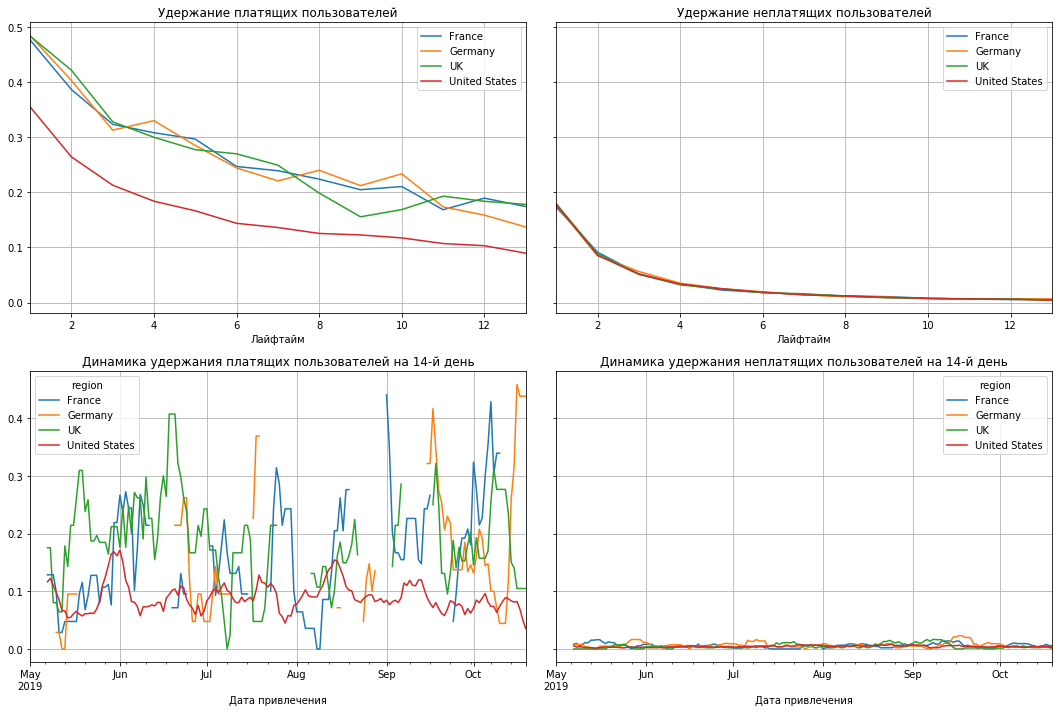

In [87]:
plot_retention(retention, retention_history, horizon_days, window=7)

In [88]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

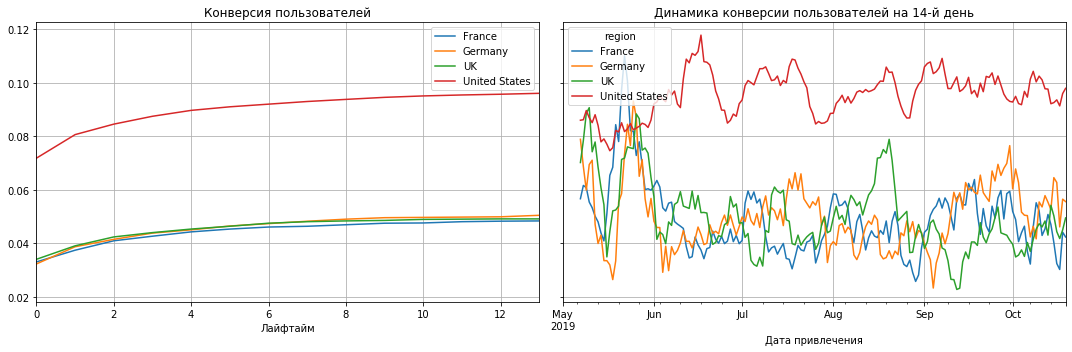

In [89]:
plot_conversion(conversion, conversion_history, horizon_days, window=7)

##### Вывод:

1. Пользователи из США конвертируются очень хорошо, в 2 раза лучше, чем пользователи из других регионов. При этом удержание платящих пользователей из США, наоборот, показывает наихудшие результаты по сравнению с пользователями из остальных регионов. Пользователи из США явно сталкиваются с проблемами.

#### Графики конверсии и удержания с разбивкой по каналам привлечения пользователей:

In [90]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

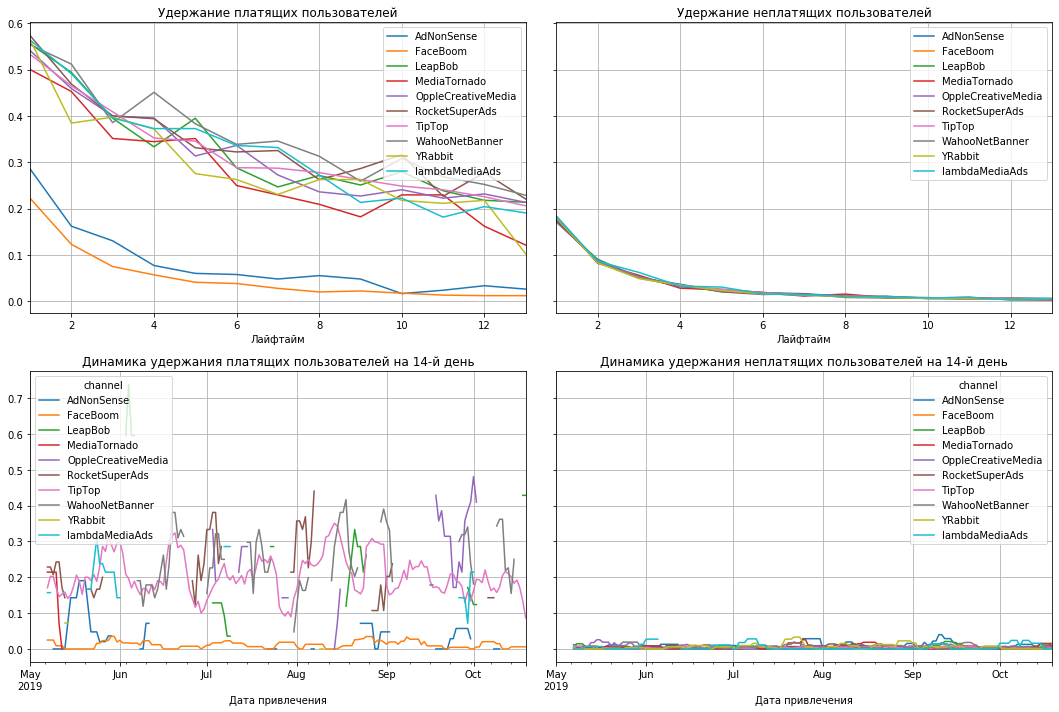

In [91]:
plot_retention(retention, retention_history, horizon_days, window=7)

In [92]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

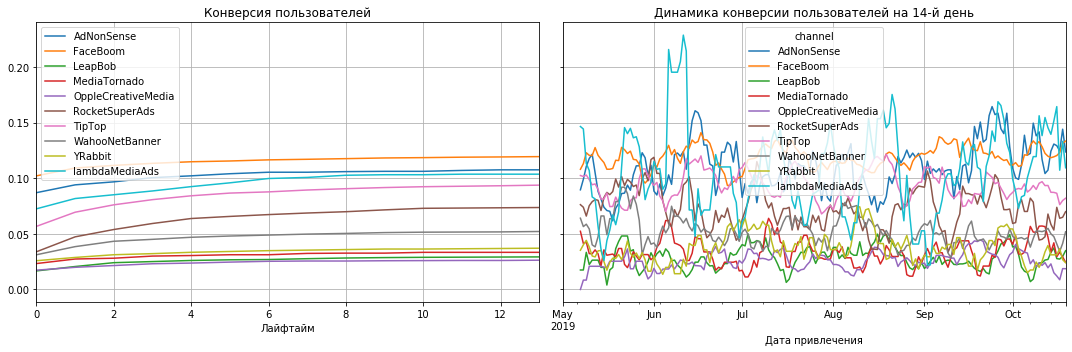

In [93]:
plot_conversion(conversion, conversion_history, horizon_days, window=7)

##### Вывод:

1. Пользователи, привлечённые по каналам FaceBoom и AdNonSense, насмотря на лучшие показатели по конвертации так же сталкиваются с какими-то проблемами, так как показывают очень плохие результаты в удержании платящих пользователей.

#### Вывод:

Изучив графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам, можно выделить несколько пунктов, которые требуют решения и дальнешего изучения:
1. Конверсия пользователей на PC ниже, чем на других платформах: возможно есть какие-то трудности у пользователей нашего приложения с платформой на PC.
2. Пользователи из США явно сталкиваются с проблемами: лучше всех конвертируются, но не задерживаются. Возможно их не устраивает контент нашего развлекательного приложения или они исптывают технические проблемы при оплате или привязки банковской карты.
3. Пользователи, привлечённые через каналы FaceBoom и AdNonSense так же испытывают какие-то технические проблемы, мешающие им совершать покупки.
4. Так же можно ведлить канал привлечения lambdaMediaAds. Пользователи, привлеченные через него, показывают хорошую конверсию и лучший LTV и 10% (3ье место) из них совершают покупки.

## Шаг 6. Напишите выводы:

Причины неэффективности привлечения пользователей:
1. Наличие технических проблем для пользователей из США и пользователей, привлечённых через FaceBoom и AdNonSense.
2. Использование половины бюджета на маркетинг на один самый дорогой источний привлечения новых пользователей - TipTop.

Рекомендации для отдела маркетинга для повышения эффективности рекламы:
1. Остановить рекламу по двум из трёх не окупающимся каналам: LeapBob и TipTop:
    - Реклама через LeapBob не окупается и через этот канал только 3.06% пользователей совершают покупки.
    - Высокая стоимость привлечения одного пользователя через TipTop, что делает рекламу не рентабельной.
2. Распределить освободившийся реклманый бюджет по всем источникам, за исключением перечисленных двух выше, а так же за исключением FaceBoom и AdNonSense(пользователи которых имеют технические проблемы).
3. Реклмау в США не останавлить, не смотря на то, что в данный момент она не окупается из-за наличия проблем у пользователей из США: есть риск потерять долю рынка, а пользователи из США лучше всех конвертируются и чаще всего совершают покупки.
4. Когда будут установлены и решены проблемы у пользователей, привлекаемых через FaceBoom и AdNonSense, перераспределить рекламный бюджет в пользу FaceBoom (чтобы его доля была не меньше, чем сейчас - около 30% а то и больше). Так как данный канал имеет высокие показатели конверсии и пользователи, привлечённые через этот канал, чаще всего совершают покупки 12.20%.